A notebook for processing MTF chart image data for each channel of OROS (the OROCHI Simulator).

# Process Overview

- load MTF images
- subtract darks
- save dark subtracted images

# Set up

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from pathlib import Path
import orochi_sim_proc as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Processing

First we load all of the frames, and show the average final frame, for each channel, and we save the images to 16 bit uint dark subtracted images. 

Loaded 1 images (ave) for: 0 (850 nm)
Loaded 1 images (ave) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
..\data\mtf_11_illum_27062023\0_850
Mean image written to ..\data\mtf_11_illum_27062023\0_850\850_mean_above_bias.tif
Error image written to ..\data\mtf_11_illum_27062023\0_850\850_error_above_bias.tif
Loaded 1 images (ave) for: 1 (475 nm)
Loaded 1 images (ave) for: 1 (475 nm)
Subtracting dark frame for: 1 (475 nm)
..\data\mtf_11_illum_27062023\1_475
Mean image written to ..\data\mtf_11_illum_27062023\1_475\475_mean_above_bias.tif
Error image written to ..\data\mtf_11_illum_27062023\1_475\475_error_above_bias.tif
Loaded 1 images (ave) for: 2 (400 nm)
Loaded 1 images (ave) for: 2 (400 nm)
Subtracting dark frame for: 2 (400 nm)
..\data\mtf_11_illum_27062023\2_400
Mean image written to ..\data\mtf_11_illum_27062023\2_400\400_mean_above_bias.tif
Error image written to ..\data\mtf_11_illum_27062023\2_400\400_error_above_bias.tif
Loaded 1 images (ave) for: 3 (550 nm)
Loaded 1 im

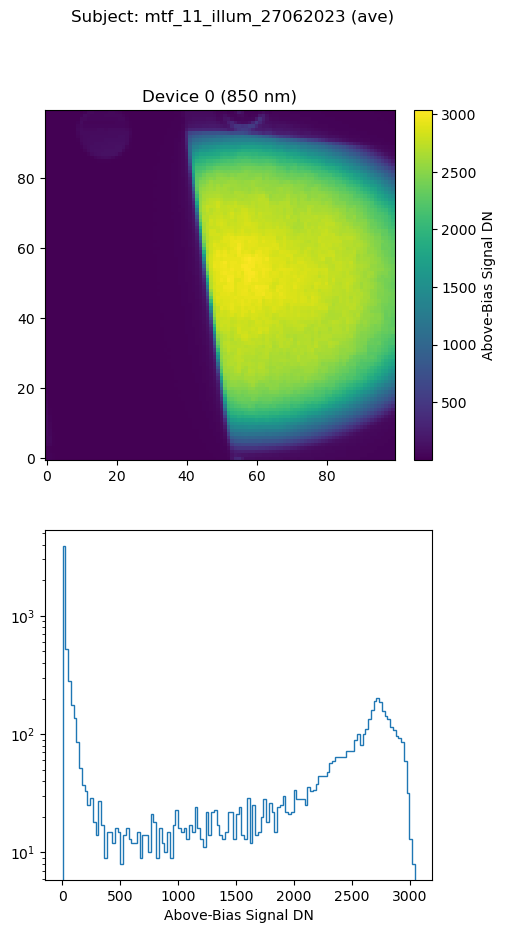

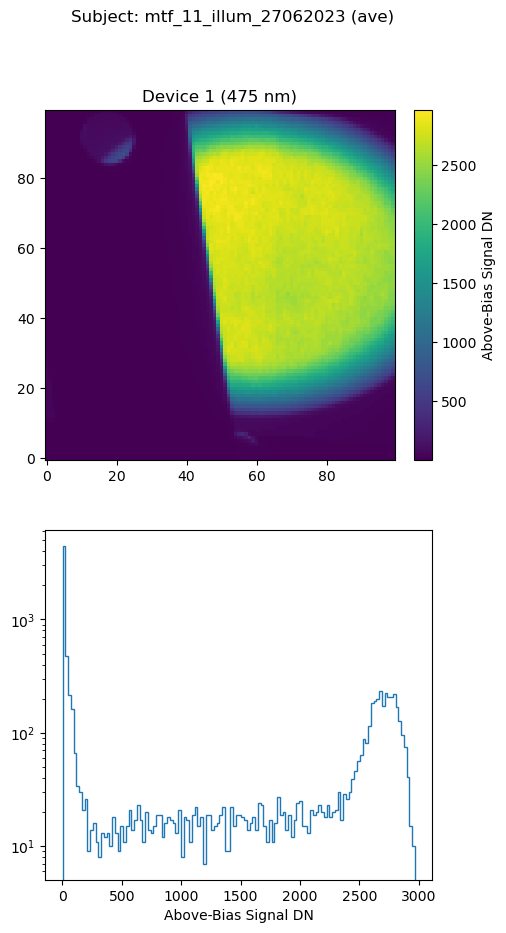

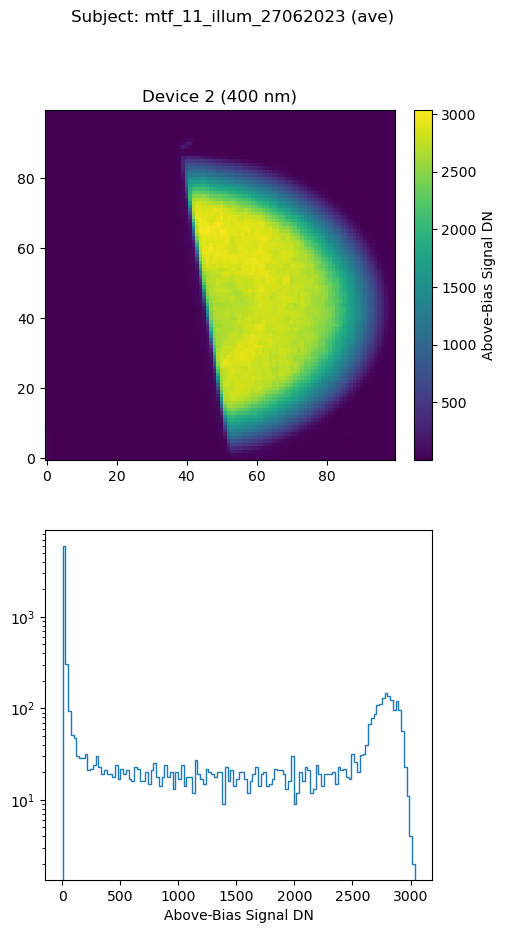

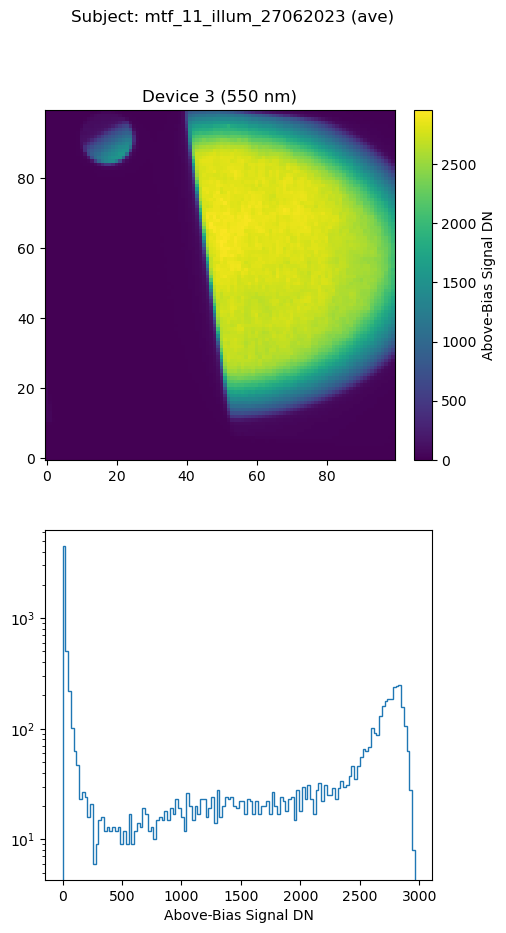

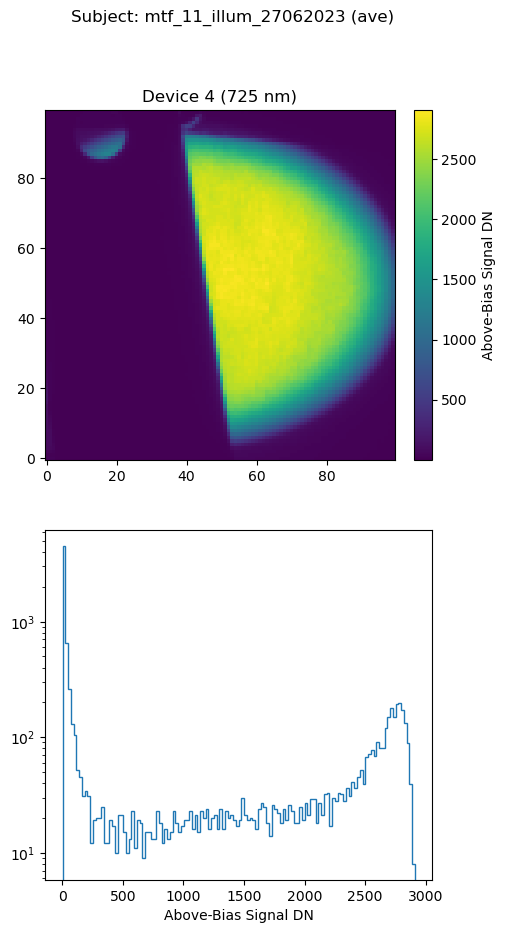

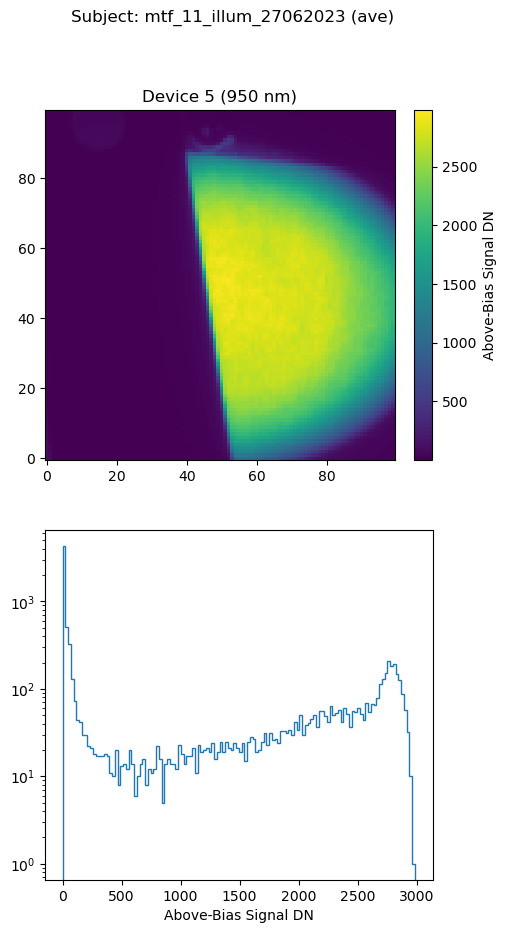

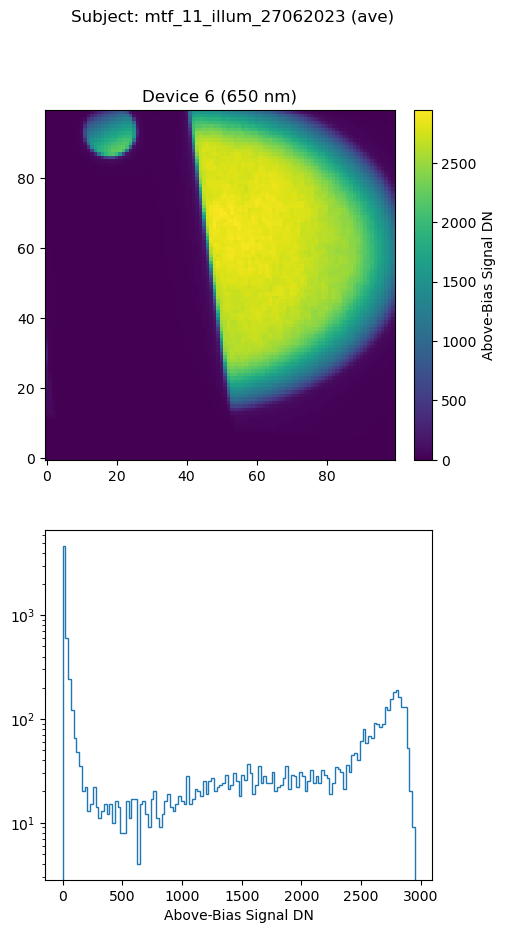

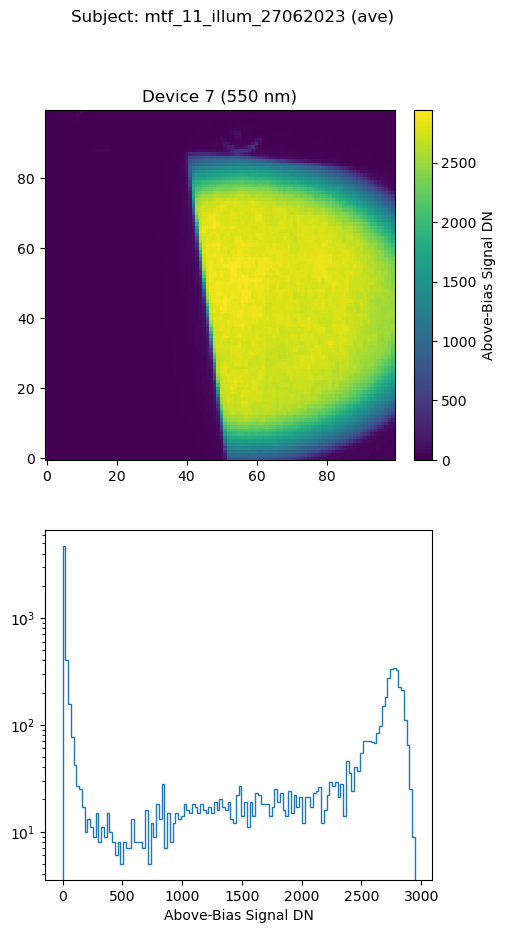

In [7]:
subject = 'mtf_11_illum_27062023'
illums = sorted(list(Path('..', 'data', subject).glob('[!.]*')))
dark_subject = 'mtf_11_dark_27062023'
darks = sorted(list(Path('..', 'data', dark_subject).glob('[!.]*')))
for i, channel in enumerate(illums):        
        # print(darks[i])
        positions = sorted(list(Path(channel).glob('[!.]*_ave_ave.tif')))
        dark = list(Path(darks[i]).glob('[!.]*_ave_ave.tif'))[0]        
        img_1 = osp.LightImage(subject=subject, channel=channel.stem, img_type='ave')
        img_1.image_load()
        drk = osp.DarkImage(dark_subject, darks[i].stem, img_type='ave')
        drk.image_load()
        img_1.dark_subtract(drk)
        # img_1.img_ave = np.divide(np.clip(img_1.img_ave, a_min=0, a_max=4096), 16).astype(np.uint8)
        img_1.img_ave = np.clip(img_1.img_ave, a_min=0, a_max=4096).astype(np.uint16)
        img_1.image_display()
        img_1.subject = 'mtf_11_above_bias_crop_27062023'
        img_1.img_type = 'above_bias'
        img_1.save_tiff()